In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/ecom.csv')
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# EDA

In [ ]:
# check individual correlations of xs with y

# scatter plot 



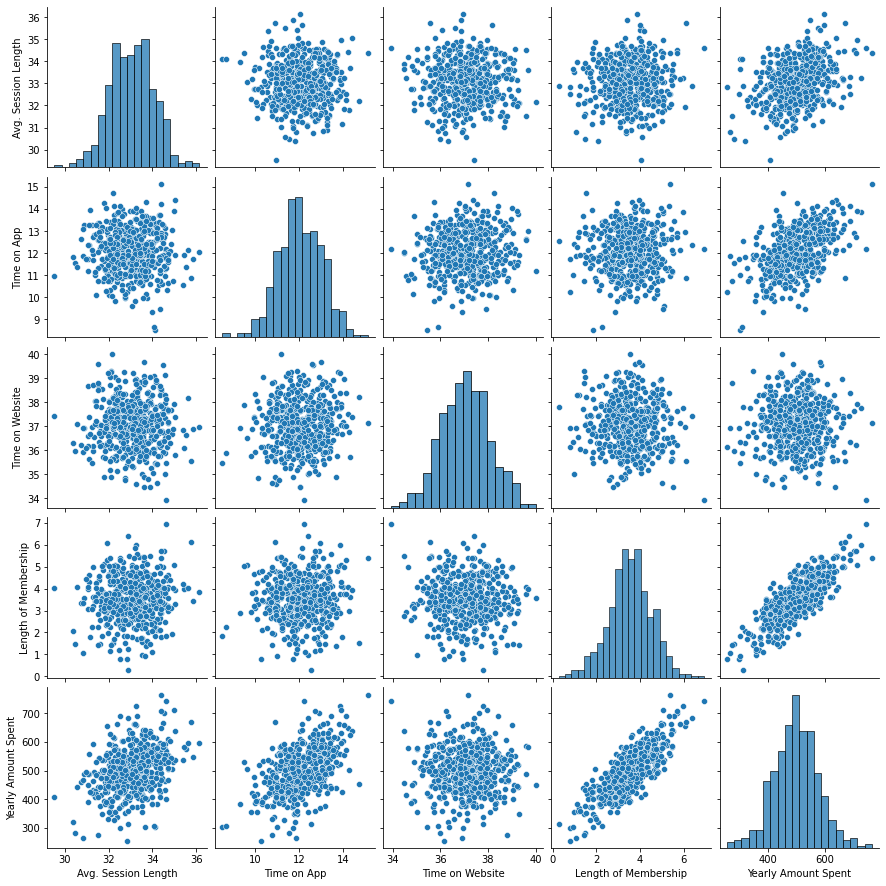

In [ ]:
# pair plots
sns.pairplot(data)

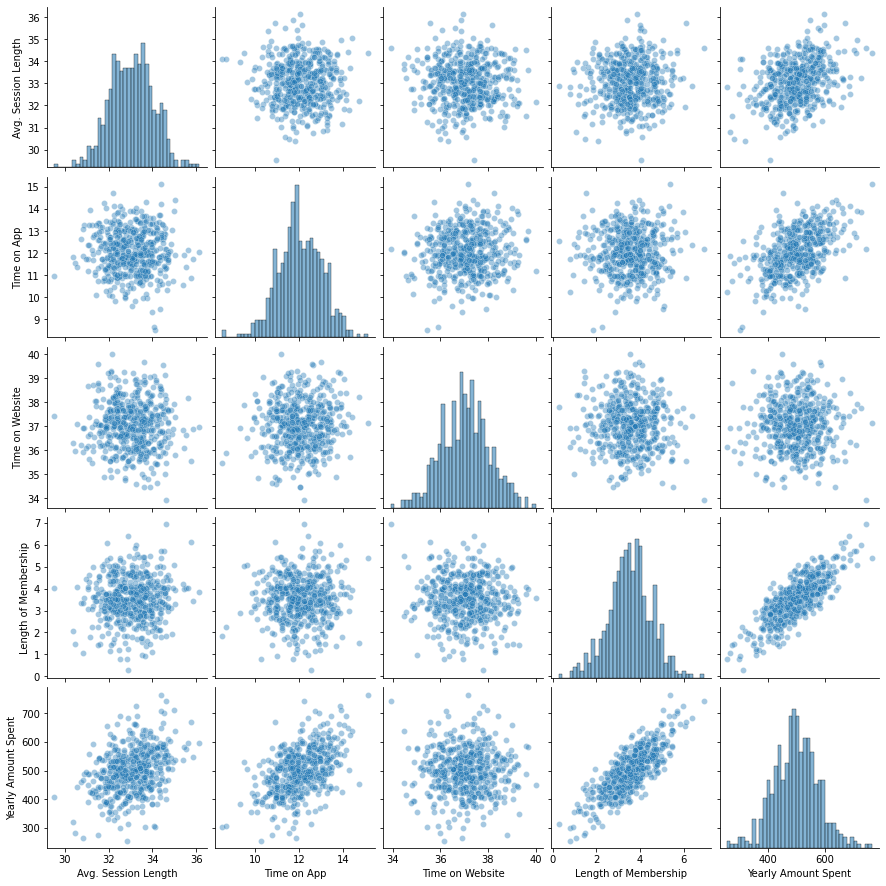

In [ ]:
sns.pairplot(data, 
             kind='scatter', 
             plot_kws={'alpha':0.4}, 
             diag_kws={'alpha':0.55, 'bins':40})

Length of Membership seems to have a strong positive correlation with Yearly amount spent. Time on App and Avg.Session Length too have some positive correlation.

# Fitting a linear model

In [ ]:
# train test split
from sklearn.model_selection import train_test_split

In [ ]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
X = data[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
Y = data[['Yearly Amount Spent']]

In [ ]:
X.head(),Y.head()

(   Avg. Session Length  Time on App  Time on Website  Length of Membership
 0            34.497268    12.655651        39.577668              4.082621
 1            31.926272    11.109461        37.268959              2.664034
 2            33.000915    11.330278        37.110597              4.104543
 3            34.305557    13.717514        36.721283              3.120179
 4            33.330673    12.795189        37.536653              4.446308,
    Yearly Amount Spent
 0           587.951054
 1           392.204933
 2           487.547505
 3           581.852344
 4           599.406092)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

In [ ]:
import statsmodels.api as sm

In [ ]:
#from sklearn.linear_model import LinearRegression
X = sm.add_constant(x_train[['Length of Membership']])
lm = sm.OLS(y_train, X)
model = lm.fit()
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.670
Model:                             OLS   Adj. R-squared:                  0.669
Method:                  Least Squares   F-statistic:                     807.5
Date:                 Sun, 26 Feb 2023   Prob (F-statistic):           8.19e-98
Time:                         09:35:12   Log-Likelihood:                -2104.1
No. Observations:                  400   AIC:                             4212.
Df Residuals:                      398   BIC:                             4220.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# plot model only possible for 2D

def plotRegression(X,Y,model):
    plt.scatter(X,Y, color='blue')
    plt.plot(X,lm.predict(X),color ='red', linewidth=3)
    plt.xticks(())
    plt.yticks(())

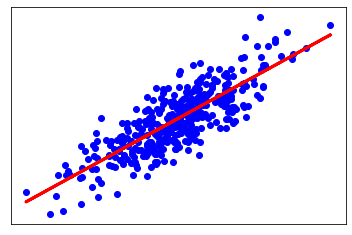

In [ ]:
#plotRegression(X_train[['Length of Membership']], Y_train, lm)

In [ ]:
# adding more features

In [ ]:
#from sklearn.linear_model import LinearRegression
X = sm.add_constant(x_train)
lm1 = sm.OLS(y_train, X)
model1 = lm1.fit()
print(model1.summary())

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.985
Model:                             OLS   Adj. R-squared:                  0.985
Method:                  Least Squares   F-statistic:                     6676.
Date:                 Sun, 26 Feb 2023   Prob (F-statistic):               0.00
Time:                         09:36:02   Log-Likelihood:                -1480.1
No. Observations:                  400   AIC:                             2970.
Df Residuals:                      395   BIC:                             2990.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


R2 value is high and p-value of F-statistic is 0. This shows that the high R2 value is significant.

In [ ]:
#adj_r2 = 1 - (1-lm1.score(X_train,Y_train))*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1)
#adj_r2

As expected, R2 has increased with addition of features

# Validating Assumptions

In [ ]:
# residual analysis

In [ ]:
y_pred = model1.predict(X)
y_true = y_train['Yearly Amount Spent']
res = y_true - y_pred
res.shape

(400,)

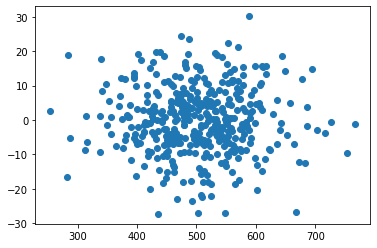

In [ ]:
# linearity
plt.scatter(y_pred, res)

Residuals are quite symmetric around 0. Shows no distinct non-linearity

Text(0, 0.5, 'frequencies')

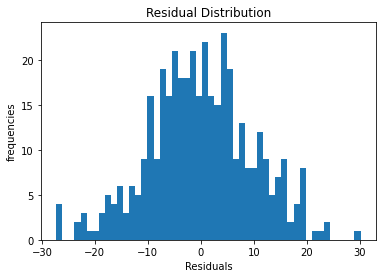

In [ ]:
# are the residuals normally distributed?

plt.hist(res, bins = 50)
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('frequencies')

In [ ]:
# expected value of residuals should be close to zero
np.mean(res)

4.904165962216211e-13

In [ ]:
# no multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

ValueError: ignored

In [ ]:
# or look at pair plots to check any dependencies


Nothing alarming in pairplots. Hence we can conclude that there is no multicollinearity.

In [ ]:
# homeoskedasticity
resids_standardized = model.get_influence().resid_studentized_internal

In [ ]:
resids = model.resid

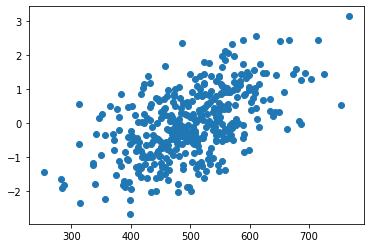

In [ ]:
plt.scatter(y_pred, resids_standardized)

In [ ]:
import statsmodels.stats.api as sms

bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                      columns=['value'],
                      index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                      columns=['value'],
                      index=['F statistic', 'p-value'])

print('\n Breusch-Pagan test ----')
print(bp_test)
print('\n Goldfeld-Quandt test ----')
print(gq_test)


 Breusch-Pagan test ----
                                  value
Lagrange multiplier statistic  0.398884
p-value                        0.527666
f-value                        0.397285
f p-value                      0.528856

 Goldfeld-Quandt test ----
                value
F statistic  1.192037
p-value      0.108685


Since p-value is >0.05 in both tests, we cannot reject the null hypothesis of homeoskedasticity

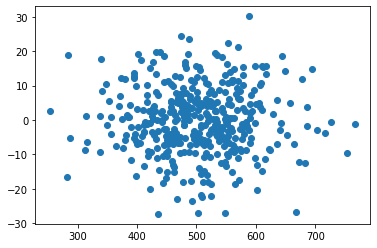

In [ ]:
plt.scatter(y_pred, res)

In [ ]:
#Autocorrelation

## Evaluation

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# on Train data

In [ ]:
mean_squared_error(y_true,y_pred, squared = False)

9.788898315370957

In [ ]:
r2_score(y_true,y_pred)

0.9854240629700333

In [ ]:
# on Test data
X = sm.add_constant(x_test)
y_pred_test = model1.predict(X)


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
mean_squared_error(y_test, y_pred_test, squared = False)

10.481590584636463

In [ ]:
r2_score(y_test, y_pred_test)#, squared = False)

0.9778130629184127